## KPIs

Librerías:

In [17]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup 
import requests

Lectura del archivo CSV:

In [18]:
homicidios = pd.read_csv('datasets\df_homicidios.csv')

In [19]:
homicidios.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     715 non-null    object 
 1   N_VICTIMAS             715 non-null    int64  
 2   FECHA                  715 non-null    object 
 3   AAAA                   715 non-null    int64  
 4   MM                     715 non-null    int64  
 5   DD                     715 non-null    int64  
 6   HORA                   715 non-null    object 
 7   HH                     715 non-null    int64  
 8   LUGAR_DEL_HECHO        715 non-null    object 
 9   TIPO_DE_CALLE          715 non-null    object 
 10  Calle                  715 non-null    object 
 11  Altura                 133 non-null    float64
 12  Cruce                  540 non-null    object 
 13  Dirección Normalizada  707 non-null    object 
 14  COMUNA                 715 non-null    int64  
 15  XY (CA

In [20]:
homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'Longitud', 'Latitud',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'ROL', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO', 'SEMESTRE', 'CATEGORIA_EDAD'],
      dtype='object')

In [21]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     715 non-null    object 
 1   N_VICTIMAS             715 non-null    int64  
 2   FECHA                  715 non-null    object 
 3   AAAA                   715 non-null    int64  
 4   MM                     715 non-null    int64  
 5   DD                     715 non-null    int64  
 6   HORA                   715 non-null    object 
 7   HH                     715 non-null    int64  
 8   LUGAR_DEL_HECHO        715 non-null    object 
 9   TIPO_DE_CALLE          715 non-null    object 
 10  Calle                  715 non-null    object 
 11  Altura                 133 non-null    float64
 12  Cruce                  540 non-null    object 
 13  Dirección Normalizada  707 non-null    object 
 14  COMUNA                 715 non-null    int64  
 15  XY (CA

Web-Scraping para obtener la poblacion de CABA:

In [22]:
url='https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/Poblacion2'
resq=requests.get(url)
soup=BeautifulSoup(resq.text, 'html.parser')
pagina=pd.read_html(url)

In [23]:
pagina[2]

,Jurisdicción,Año 2010,Año 2015,Año 2020
0,República Argentina,40.117.096,43.131.966,45.376.763
1,Ciudad Autónoma de Buenos Aires,2.890.151,3.054.267,3.075.646
2,Buenos Aires,15.625.084,16.659.931,17.541.141
3,Catamarca,367.828,396.895,415.438
4,Chaco,1.055.259,1.143.201,1.204.541
5,Chubut,509.108,566.922,618.994
6,Córdoba,3.308.876,3.567.654,3.760.450
7,Corrientes,992.595,1.070.283,1.120.801
8,Entre Ríos,1.235.994,1.321.415,1.385.961
9,Formosa,530.162,579.250,605.193


# KPI  1

Objetivo: Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

In [24]:

# Calcular el número de homicidios en siniestros viales para cada semestre
homicidios_semestre = homicidios.groupby(['AAAA', 'SEMESTRE'])['N_VICTIMAS'].sum()

# Calcular la población total en CABA en un promedio de los ultimos 6 años
poblacion_caba =(3054267 + 3075646) / 2

# Calcular la tasa de homicidios en siniestros viales para cada semestre
tasa_homicidios_semestre = (homicidios_semestre / poblacion_caba) * 100000
np.round(tasa_homicidios_semestre , 2)

# Calcular la reducción en la tasa de homicidios en siniestros viales
reduccion_tasa_homicidios = ((tasa_homicidios_semestre.shift(-1) - tasa_homicidios_semestre) / tasa_homicidios_semestre) * 100



**Transformacion de datos para Power BI**

In [25]:
# Redondear 
reduccion_tasa_homicidios = reduccion_tasa_homicidios.apply(lambda x: round(x, 0))

In [26]:
#Eliminar nulos (2021, semestre 2)
reduccion_tasa_homicidios.replace(np.NaN, 0, inplace=True)

In [27]:
# Convertir a enteros
reduccion_tasa_homicidios_enteros = reduccion_tasa_homicidios.astype(int)


In [28]:
reduccion_tasa_homicidios_enteros 

AAAA  SEMESTRE
2016  1           22
      2          -13
2017  1            3
      2           -1
2018  1           13
      2          -28
2019  1          -18
      2          -34
2020  1           61
      2           10
2021  1          -24
      2            0
Name: N_VICTIMAS, dtype: int32

In [29]:
homicidios_semestre

AAAA  SEMESTRE
2016  1           65
      2           79
2017  1           69
      2           71
2018  1           70
      2           79
2019  1           57
      2           47
2020  1           31
      2           50
2021  1           55
      2           42
Name: N_VICTIMAS, dtype: int64

In [30]:
tasa_homicidios_semestre

AAAA  SEMESTRE
2016  1           2.120748
      2           2.577524
2017  1           2.251255
      2           2.316509
2018  1           2.283882
      2           2.577524
2019  1           1.859733
      2           1.533464
2020  1           1.011434
      2           1.631345
2021  1           1.794479
      2           1.370329
Name: N_VICTIMAS, dtype: float64

In [31]:
reduccion_tasa_homicidios_enteros.head(10)

AAAA  SEMESTRE
2016  1           22
      2          -13
2017  1            3
      2           -1
2018  1           13
      2          -28
2019  1          -18
      2          -34
2020  1           61
      2           10
Name: N_VICTIMAS, dtype: int32

In [32]:
reduccion_tasa_homicidios_enteros.to_csv(r'datasets\reduccion_tasa_homicidios.csv')

<Axes: xlabel='AAAA,SEMESTRE'>

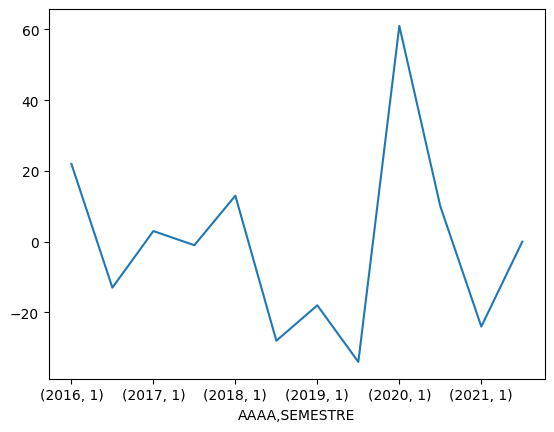

In [33]:
reduccion_tasa_homicidios.plot()


**KPI 1: Reducción del 10% en la tasa de homicidios en siniestros viales en CABA en comparación con el semestre anterior**

Este KPI se enfoca en medir la evolución de la tasa de homicidios en siniestros viales en la Ciudad Autónoma de Buenos Aires (CABA) en un período de varios años, comparando los dos últimos semestres.  Análisis más detallado:

- **Tendencia general:** La tendencia en este KPI varía año tras año. En algunos años, se logra una disminución significativa, mientras que en otros se observa un aumento en la tasa de homicidios en siniestros viales.

- **Año 2020:** Se destaca un aumento significativo en la tasa de homicidios en el primer semestre (61.29%), pero una mejora en el segundo semestre (10%), lo que puede ser atribuible a factores específicos, como el impacto de la pandemia o medidas de seguridad vial.

- **Año 2021:** Los datos parecen estar incompletos, ya que falta información para el segundo semestre. Esto puede dificultar una evaluación precisa del rendimiento en ese año.

- **Comparación entre semestres:** En algunos casos, se logra la reducción deseada del 10% entre semestres, mientras que en otros no se alcanza.

- **Análisis de causas:** Sería útil profundizar en las razones detrás de las variaciones en la tasa de homicidios en siniestros viales, como cambios en las políticas de seguridad vial, mejoras en la infraestructura vial, o la influencia de eventos externos como la pandemia.

# KPI  2

Objetivo: Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

In [34]:
# Filtrar los datos para accidentes mortales de motociclistas
accidentes_motociclistas = homicidios[homicidios['VICTIMA'] == 'MOTO']

# Calcular la cantidad de accidentes mortales de motociclistas para cada año
accidentes_motociclistas_year = accidentes_motociclistas.groupby('AAAA')['ID'].count()

# Calcular la reducción en la cantidad de accidentes mortales de motociclistas
reduccion_accidentes_motociclistas = ((accidentes_motociclistas_year.shift(-1) - accidentes_motociclistas_year) / accidentes_motociclistas_year) * 100

**Transformacion de datos para Power BI**

In [35]:
# Redondear 
reduccion_accidentes_motociclistas= reduccion_accidentes_motociclistas.apply(lambda x: round(x, 0))

#Eliminar nulos (2021, semestre 2)
reduccion_accidentes_motociclistas.replace(np.NaN, 0, inplace=True)

# Convertir a enteros
reduccion_accidentes_motociclistas_enteros = reduccion_accidentes_motociclistas.astype(int)

In [36]:
accidentes_motociclistas.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,SEMESTRE,CATEGORIA_EDAD
0,2016-0001,1,2016-01-01,2016,1,1,2023-12-05 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19.0,2016-01-01 00:00:00,1,Adultos Jóvenes
2,2016-0003,1,2016-01-03,2016,1,3,2023-12-05 07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30.0,2016-01-03 00:00:00,1,Adultos Jóvenes
3,2016-0004,1,2016-01-10,2016,1,10,2023-12-05 00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18.0,NaN,1,Niños


In [37]:
accidentes_motociclistas_year

AAAA
2016    65
2017    56
2018    57
2019    50
2020    28
2021    46
Name: ID, dtype: int64

In [38]:
reduccion_accidentes_motociclistas

AAAA
2016   -14.0
2017     2.0
2018   -12.0
2019   -44.0
2020    64.0
2021     0.0
Name: ID, dtype: float64

In [39]:
reduccion_accidentes_motociclistas_enteros.info()

<class 'pandas.core.series.Series'>
Index: 6 entries, 2016 to 2021
Series name: ID
Non-Null Count  Dtype
--------------  -----
6 non-null      int32
dtypes: int32(1)
memory usage: 72.0 bytes


In [40]:
reduccion_accidentes_motociclistas_enteros.to_csv(r'datasets\reduccion_accidentes_motociclistas.csv')

<Axes: xlabel='AAAA'>

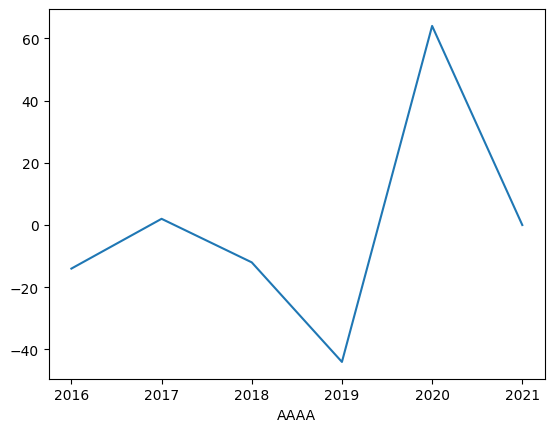

In [41]:
reduccion_accidentes_motociclistas.plot()


**KPI 2: Reducción del 7% en la cantidad de accidentes mortales de motociclistas en CABA en el último año en comparación con el año anterior**

Este KPI se centra en evaluar la evolución de la cantidad de accidentes mortales de motociclistas en la Ciudad Autónoma de Buenos Aires (CABA) en un período de varios años, comparando los dos últimos años. Análisis más detallado:

- **Tendencia general:** En este KPI, también se observa una variación año tras año, con fluctuaciones tanto positivas como negativas.

- **Año 2020:** Destaca un aumento significativo del 64.29% en la cantidad de accidentes mortales de motociclistas, lo que podría requerir una atención inmediata para comprender las razones detrás de este aumento.

- **Año 2021:** Al igual que en el KPI 1, faltan datos para el año 2021 en este KPI, lo que dificulta una evaluación precisa.

- **Comparación anual:** La reducción del 7% en la cantidad de accidentes mortales de motociclistas es el objetivo, pero no siempre se logra. Por ejemplo, en el año 2019, se observa una disminución significativa del 44%.

- **Análisis de causas:** Para entender las fluctuaciones en este KPI, sería importante analizar factores como las medidas de seguridad específicas para motociclistas, el aumento en la cantidad de motociclistas en la ciudad y la aplicación de políticas de tráfico.


# KPI  3

Objetivo: Reducir en un 15% la cantidad de accidentes mortales de niños en el último año, en CABA, respecto al año anterior.

In [42]:
# Filtrar los datos para accidentes mortales de motociclistas
accidentes_kids = homicidios[homicidios['CATEGORIA_EDAD'] == 'Niños']

# Calcular la cantidad de accidentes mortales de motociclistas para cada año
accidentes_kids_year = accidentes_kids.groupby('AAAA')['ID'].count()

# Calcular la reducción en la cantidad de accidentes mortales de motociclistas
reduccion_accidentes_kids  = ((accidentes_kids_year.shift(-1) - accidentes_kids_year) / accidentes_kids_year) * 100

In [43]:
reduccion_accidentes_kids

AAAA
2016     5.555556
2017   -36.842105
2018    25.000000
2019   -46.666667
2020   -12.500000
2021          NaN
Name: ID, dtype: float64

**Transformacion de datos para Power BI**

In [44]:
# Redondear 
reduccion_accidentes_kids= reduccion_accidentes_kids.apply(lambda x: round(x, 0))

#Eliminar nulos (parte de 2021)
reduccion_accidentes_kids.replace(np.NaN, 0, inplace=True)

# Convertir a enteros
reduccion_accidentes_kids_enteros = reduccion_accidentes_kids.astype(int)

In [45]:
reduccion_accidentes_kids_enteros

AAAA
2016     6
2017   -37
2018    25
2019   -47
2020   -12
2021     0
Name: ID, dtype: int32

In [46]:
reduccion_accidentes_kids_enteros.to_csv(r'datasets\reduccion_accidentes_kids.csv')

<Axes: xlabel='AAAA'>

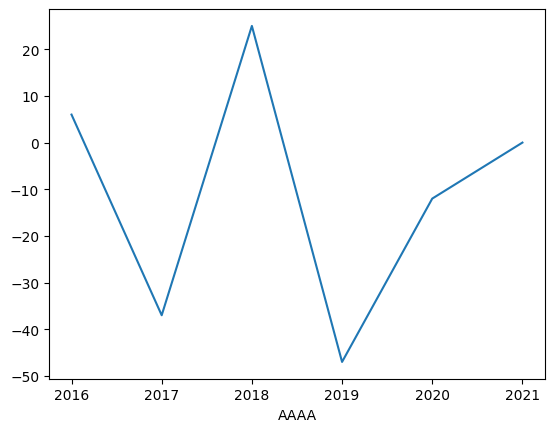

In [47]:
reduccion_accidentes_kids.plot()